In [1]:
import numpy as np # always need it
import scipy as sp # often use it
import pylab as pl # do the plots
import matplotlib.pyplot as plt # for pretty plots
from mpl_toolkits.mplot3d import Axes3D
from tqdm.notebook import tqdm as tqdm

In [ ]:
def Convolution_Wasserstein(a, b, C, l):
    u = np.ones(len(a))
    K = np.exp(-C/l)
    for i in range(len(a)):
        v = b / (K.T @ u)
        u = a / (K @ v)
    T = np.diag(u) @ K @ np.diag(v)
    return T

In [25]:
def Wasserstein_barycentre(mu_i, alpha, Ht, a, ent_sharp = False, N = 1):
    n1,n2 = mu_i[0].shape
    k = len(mu_i)
    d = np.zeros((k, n1, n2))
    v = np.ones((k,n1,n2))
    w = np.ones((k,n1,n2))
    mu = np.ones((n1,n2))
    for j in range(N):
        mu = np.ones((n1,n2))
        for i in range(k):
            w[i] = mu_i[i]/(Ht @ (a*v[i]))
            d[i] = v[i]*(Ht@(a*w[i]))
            mu = mu*(d[i]**alpha[i])

        #entropic sharpening, optional
        if (ent_sharp):
            H_0 = H0(mu_i, a)
            mu = entropic_sharpening(mu, H_0, a)

        for i in range(k):
            v[i] = v[i]*mu/d[i]

    return mu

In [3]:
def entropic_sharpening(mu, H0, a):
    beta = 1
    if(H(mu, a) + np.transpose(a)*mu > H0 + 1 ):
        beta = sp.optimize.root(np.transpose(a)*mu**beta + H(mu**beta, a) - (1 + H0), beta > 0)
    return mu**beta

In [4]:
def H(mu, a):
    sum = 0
    for i in range(len(mu)):
        sum -= a[i] * mu[i] * np.log(mu[i])
    return sum

In [5]:
def H0(mu_i,a):
    for i in range(len(mu_i)):
        h = H(mu_i[i],a)
        if(h > H0):
            H0 = h 
    return h

In [6]:
def kernel(n1, n2, gamma, mesh1, mesh2): 
    a = np.zeros((n1, n2))
    min = np.infty
    for i1 in range(n1):
        for i2 in range(n2):
            a[i1,i2] = np.exp(-np.linalg.norm(i1 - i2)**2 / gamma)
            # if a[i1,i2] == 0 : 
                # print(-np.linalg.norm([mesh1[i1].x - mesh2[i2].x, mesh1[i1].y - mesh2[i2].y, mesh1[i1].z - mesh2[i2].z])**2 / gamma)
                # return a
    return a

In [16]:

n1 = 100
n2 = 100

A = np.ones((n1,n2))*(10**(-8))
#A = np.zeros((10,10))
for i in range(1,n1-1):
    for j in range(1,n2-1):
        A[i,j] = 1.0  
#A = 1-A     
#A = 1.0-np.mean(img.imread('cat.jpg'),axis=2);
A /= np.sum(A);

           
B = np.ones((n1,n2))*(10**(-8))
#B = np.zeros((10,10))
for i in range(1,n1-1):
    for j in range(1,n2-1):
        if((i-n1/2)**2 + (j-n2/2)**2 <= 400):
            B[i,j] = 1.0  
#B = 1-B
#B = 1.0-np.mean(img.imread('star.png'),axis=2);
B /= np.sum(B);


C = np.ones((n1,n2))*(10**(-8))
for j in range(1, n2-1):
    for i in range(1, n1-1):
        if(i <= (n1+j)/2 and i>=(n1-j)/2):
            C[j,i] = 1.0
C /= np.sum(C)

print(C)

[[2.04123288e-12 2.04123288e-12 2.04123288e-12 ... 2.04123288e-12
  2.04123288e-12 2.04123288e-12]
 [2.04123288e-12 2.04123288e-12 2.04123288e-12 ... 2.04123288e-12
  2.04123288e-12 2.04123288e-12]
 [2.04123288e-12 2.04123288e-12 2.04123288e-12 ... 2.04123288e-12
  2.04123288e-12 2.04123288e-12]
 ...
 [2.04123288e-12 2.04123288e-12 2.04123288e-04 ... 2.04123288e-04
  2.04123288e-04 2.04123288e-12]
 [2.04123288e-12 2.04123288e-04 2.04123288e-04 ... 2.04123288e-04
  2.04123288e-04 2.04123288e-12]
 [2.04123288e-12 2.04123288e-12 2.04123288e-12 ... 2.04123288e-12
  2.04123288e-12 2.04123288e-12]]


In [8]:
n1 = 100
n2 = 100
gamma = 0.1
Ht = kernel(n1, n2, gamma, A, B)
a = np.ones((n1,n2))*1/(n1*n2)

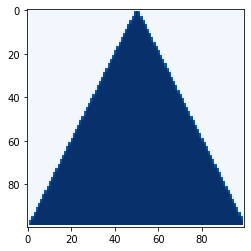

In [29]:
mu = Wasserstein_barycentre((A, B, C), (0.8, 0, 0.2), Ht, a, N=3)
plt.imshow(mu, cmap = 'Blues')
plt.show()